In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.neural_network import MLPClassifier
import pandas as pd

def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image,  cmap='gray', **options)
    plt.axis("off")


Using TensorFlow backend.


#  Principal Component Analysis

PCA is a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering, and much more.

## Introducing Principal Component Analysis

Principal component analysis is a fast and flexible unsupervised method for dimensionality reduction in data.

Consider the following example, 200 points:

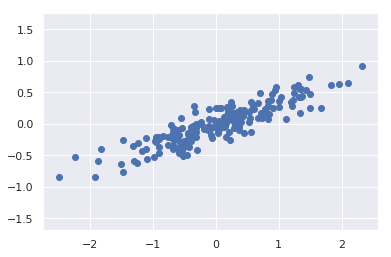

In [3]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

By eye, it is clear that there is a nearly linear relationship between the x and y variables.
This is reminiscent of the linear regression scatter plot data, but the problem setting here is slightly different: rather than attempting to *predict* the $y$ values from the $x$ values, we aim to "compress"
the data.

In PCA, this compression (dimensionality reduction)  is quantified by finding a list of the *principal axes* in the data, and using those axes to describe the dataset.
Using Scikit-Learn's ``PCA`` estimator, we can compute this as follows:

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X);

The fit learns some quantities from the data, most importantly the "components" and "explained variance":

In [6]:
#these are the eigen-vectors
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [7]:
#these are the eigen-values
print(pca.explained_variance_)

[0.7625315 0.0184779]


To see what these numbers mean, let's visualize them as vectors over the input data, using the "components" to define the direction of the vector, and the "explained variance" to define the squared-length of the vector:

ValueError: too many values to unpack (expected 2)

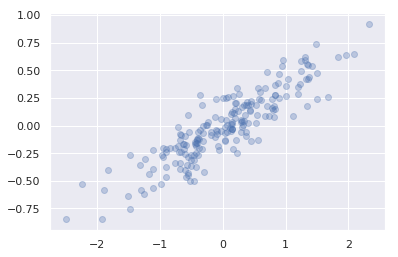

In [46]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, color='k')
    ax.annotate('', v1, v0, arrowprops=arrowprops)
# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

These vectors represent the *principal axes* of the data, and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data—more precisely, it is a measure of the variance of the data when projected onto that axis.
The projection of each data point onto the principal axes are the "principal components" of the data.



### PCA as dimensionality reduction

Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

Here is an example of using PCA as a dimensionality reduction transform:

In [10]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


In [16]:
#only one dimension
X_pca[0:10,:]

array([[ 0.67676923],
       [-1.07121393],
       [ 0.72791236],
       [ 2.30964136],
       [ 0.63005232],
       [ 1.02448887],
       [ 0.77718351],
       [-1.39656414],
       [-0.29104987],
       [ 1.88864221]])

The transformed data has been reduced to a single dimension.
To understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data and plot it along with the original data:

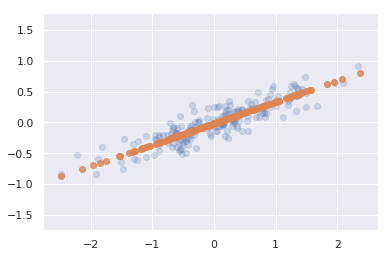

In [11]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

The light points are the original data, while the dark points are the projected version.
This makes clear what a PCA dimensionality reduction means: the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance.
The fraction of variance that is cut out (proportional to the spread of points about the line formed in this figure) is roughly a measure of how much "information" is discarded in this reduction of dimensionality.

This reduced-dimension dataset is in some senses "good enough" to encode the most important relationships between the points: despite reducing the dimension of the data by 50%, the overall relationship between the data points are mostly preserved.

### PCA for reducing the data dimension before regression/classification

In [19]:
#Load the data and split it into train and test sets
(X_train,y_train), (X_test, y_test) = mnist.load_data()
#Get the image shape
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


True value=
 [[5 0 4 1 9 2 1 3 1]
 [4 3 5 3 6 1 7 2 8]
 [6 9 4 0 9 1 1 2 4]]


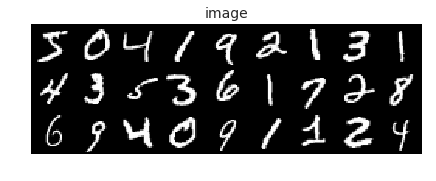

In [20]:
plt.figure(figsize=(7,7))
# Plotting 'original' image
plot_digits(X_train[0:27,:],images_per_row=9)
plt.title("image", fontsize=14)
print("True value=\n",y_train[0:27].reshape(-1,9))

In [40]:
X_train_r = X_train.reshape(X_train.shape[0],28*28)
X_test_r  =  X_test.reshape(X_test.shape[0],28*28)
print(X_train_r.shape)

(60000, 784)


We have $28 \times 28=784$ columns in our matrix and, therefore, a lot of data.
It is clear that some of that columns are not including any useful information.
FOr instance, there are many pixels that are black in all images in the dataset.

Can we compress the data so that we keep all useful info and discard the the rest?  
Yes with dimensionality reduction like PCA.

In [25]:
#classifier accuracy before PCA
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(multi_class='multinomial',solver='lbfgs',  fit_intercept=True, max_iter=100)
clf.fit(X_train_r,y_train)
y_pred = clf.predict(X_test_r)

from sklearn.metrics import confusion_matrix, accuracy_score
print(accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

0.9255


/home/benavoli/anaconda3/envs/mypy/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


array([[ 963,    0,    0,    3,    1,    3,    4,    4,    2,    0],
       [   0, 1112,    4,    2,    0,    1,    3,    2,   11,    0],
       [   3,   10,  926,   15,    6,    4,   15,    8,   42,    3],
       [   4,    1,   21,  916,    1,   26,    3,    9,   22,    7],
       [   1,    1,    7,    3,  910,    0,    9,    7,   10,   34],
       [  11,    2,    1,   33,   11,  776,   11,    6,   35,    6],
       [   9,    3,    7,    3,    7,   16,  910,    2,    1,    0],
       [   1,    6,   24,    5,    7,    1,    0,  951,    3,   30],
       [   8,    7,    6,   23,    6,   26,   10,   10,  869,    9],
       [   9,    7,    0,   11,   25,    6,    0,   22,    7,  922]])

In [44]:
#We only keep 100 components
pca = PCA(n_components=100)
pca.fit(X_train_r)
X_pca_train = pca.transform(X_train_r)
print("original shape:   ", X_train_r.shape)
print("transformed shape:", X_pca_train.shape)
X_pca_test = pca.transform(X_test_r)

original shape:    (60000, 784)
transformed shape: (60000, 100)


In [45]:
clf = LogisticRegression(multi_class='multinomial',solver='lbfgs',  fit_intercept=True, max_iter=100)
clf.fit(X_pca_train,y_train)
y_pred = clf.predict(X_pca_test)

print(accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

0.9159


/home/benavoli/anaconda3/envs/mypy/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


array([[ 958,    0,    3,    1,    2,    3,    9,    2,    2,    0],
       [   0, 1104,    1,    4,    1,    1,    4,    2,   18,    0],
       [  12,   13,  923,   10,    7,    5,   13,   11,   31,    7],
       [   4,    2,   18,  912,    2,   27,    5,   13,   15,   12],
       [   2,    3,    5,    2,  909,    0,   12,    2,    8,   39],
       [   9,    4,    5,   35,   11,  762,   19,    9,   30,    8],
       [  11,    4,    6,    1,    8,   14,  909,    2,    3,    0],
       [   3,   11,   18,    5,    7,    1,    0,  948,    1,   34],
       [   8,   17,    8,   28,   13,   36,   13,   13,  828,   10],
       [  12,    6,    1,   10,   36,    6,    0,   27,    5,  906]])

### Choosing the number of components

A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data.
This can be determined by looking at the cumulative *explained variance ratio* as a function of the number of components:

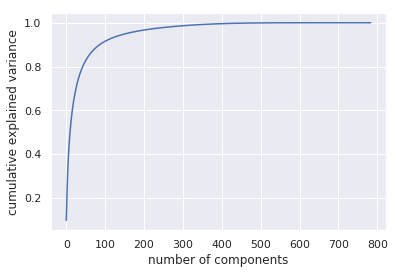

In [41]:
pca = PCA().fit(X_train_r)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

This curve quantifies how much of the total, 784-dimensional variance is contained within the first $N$ components.
For example, we see that with the digits the first 50 components contain approximately 80% of the variance, while you need around 400 components to describe close to 100% of the variance.